In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os

from random import shuffle
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
shape_folder = os.getcwd() + '/shapes'
shapes = os.listdir(shape_folder)

['square', 'triangle', 'star', 'circle']

In [8]:
data = []
target = []
for i, shape in enumerate(shapes):
    path = os.path.join(shape_folder, shape)
    for filename in os.listdir(path):
        image = cv2.imread(os.path.join(path , filename),0)
        image = image.reshape(200,200,1)
        data.append(image)
        target.append(i)
        

In [9]:
data = np.array(data)
target = np.array(target)
target = to_categorical(target)

In [10]:
data.shape, target.shape

((14970, 200, 200, 1), (14970, 4))

In [11]:
X_full, X_test, y_full, y_test = train_test_split(data, target, stratify=target, random_state= 42, test_size = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, stratify=y_full, random_state= 42, test_size = 0.15)

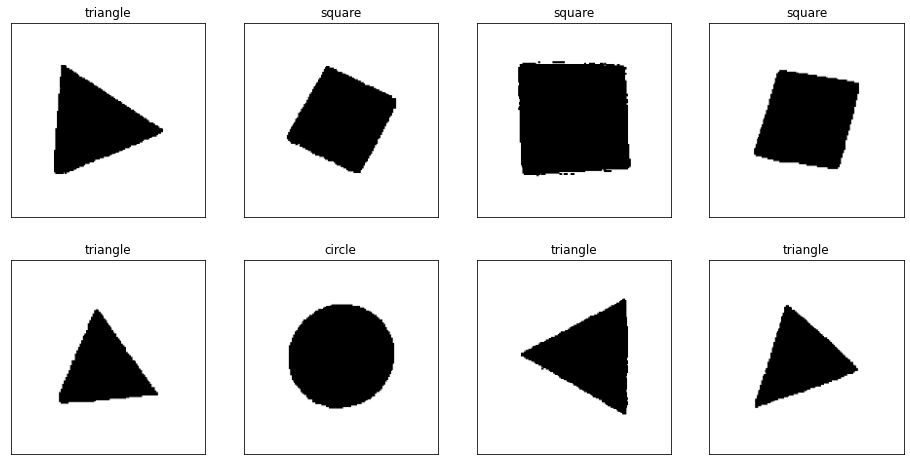

In [12]:
def show_images(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        ax.title.set_text(shapes[np.argmax(y[ind])])
        ax.set_xticks([]) 
        ax.set_yticks([])
show_images(8, X_train, y_train)

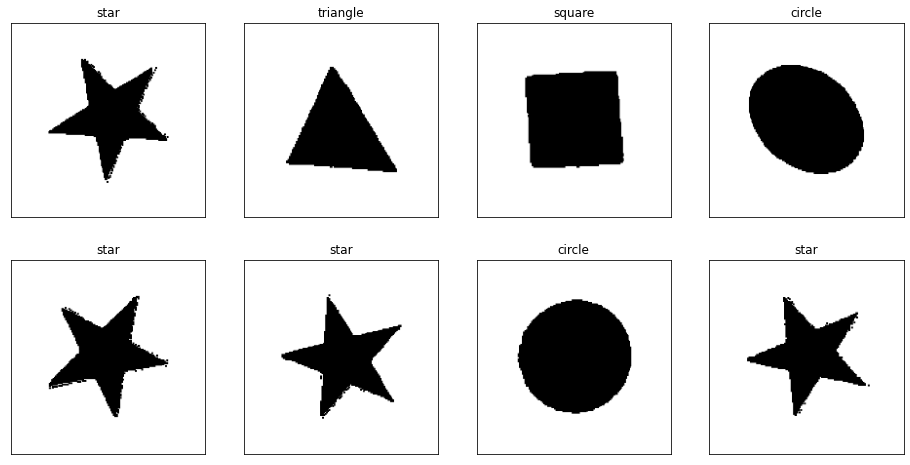

In [13]:
show_images(8, X_val, y_val)

In [14]:
X_test = X_test/255.0
X_train = X_train/255.0
X_val = X_val/255.0

In [15]:
model = Sequential([
    Conv2D(32, (3,3),strides = 2 ,input_shape = (200,200,1), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9

In [16]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_val, y_val))

Epoch 1/5
299/299 [==============================] - 63s 208ms/step - loss: 0.8139 - accuracy: 0.6051 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 2/5
299/299 [==============================] - 70s 234ms/step - loss: 0.0470 - accuracy: 0.9839 - val_loss: 0.0013 - val_accuracy: 0.9994
Epoch 3/5
299/299 [==============================] - 69s 230ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 6.0029e-06 - val_accuracy: 1.0000
Epoch 4/5
299/299 [==============================] - 69s 231ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 4.2800e-06 - val_accuracy: 1.0000
Epoch 5/5
299/299 [==============================] - 81s 269ms/step - loss: 0.0080 - accuracy: 0.9967 - val_loss: 2.8184e-06 - val_accuracy: 1.0000


In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy is {}%'.format(accuracy*100))

117/117 [==============================] - 8s 71ms/step - loss: 5.8669e-06 - accuracy: 1.0000
Accuracy is 100.0%


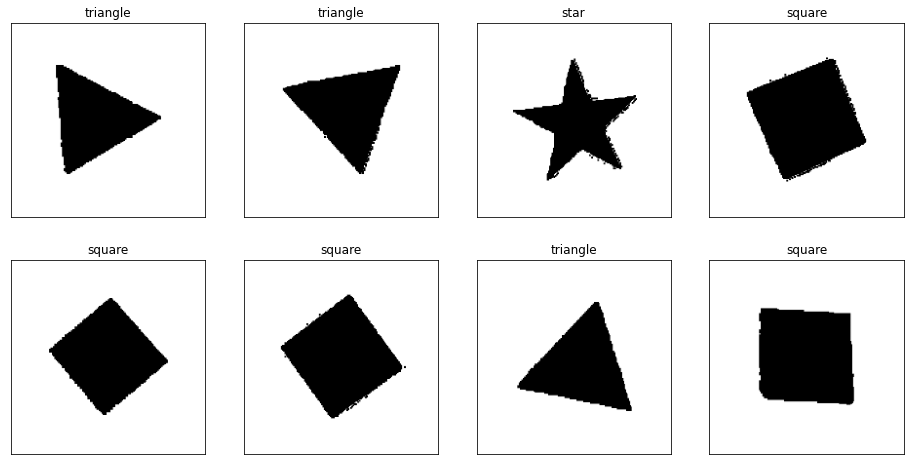

In [18]:
preds = model.predict(X_test)
show_images(8,X_test, preds)